In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import os
import sys
from pathlib import Path
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from plotnine import *
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
sns.set(style="whitegrid", context="talk")
pd.set_option('display.max_columns', None)
sys.path.append(os.path.abspath('..'))
from Scoreci.config import PROCESSED_DATA_DIR, INTERIM_DATA_DIR

2025-06-24 06:51:08.920 | INFO     | Scoreci.config:<module>:11 - PROJ_ROOT path is: C:\Users\amigu\repos\autonomia


In [2]:
df = pd.read_parquet(os.path.join(INTERIM_DATA_DIR, 'Sabana_integrada_asesor_ScoreCI_VF.parquet'))

In [3]:
df.shape

(1722, 183)

In [4]:
df.set_index('ASESOR_ID', inplace=True)

In [5]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1722 entries, 1949827 to 92461366
Columns: 182 entries, PORC_CR_T14 to EMPEORA_CATS_T2
dtypes: category(1), float64(126), int32(21), int64(32), int8(1), object(1)
memory usage: 2.2+ MB


None

,PORC_CR_T14,PORC_CR_T9,PORC_CR_T6,PORC_CR_T0,PORC_CR_T17,PORC_CR_T18,PORC_CR_T4,PORC_CR_T7,PORC_CR_T26,PORC_CR_T2,PORC_CR_T21,PORC_CR_T15,PORC_CR_T8,PORC_CR_T20,PORC_CR_T23,PORC_CR_T11,PORC_CR_T3,PORC_CR_T22,PORC_CR_T13,PORC_CR_T5,PORC_CR_T10,PORC_CR_T16,PORC_CR_T19,PORC_CR_T25,PORC_CR_T12,PORC_CR_T24,PORC_CR_T1,y,POSITION_DESC,ANT_ASESOR,C_COBRANZA_T0,C_COBRANZA_T1,C_COBRANZA_T2,HORAS_VUELO,PORCT_RENOV_T2,PORCT_RENOV_T1,PORCT_RENOV_T0,ANT_ASESOR_RANGO,ANT_ASESOR_RANGO_NUM,PCNT_FPD_T2,PCNT_FPD_T1,PCNT_FPD_T0,TOT_AMI_T2,TOT_AMI_T1,TOT_AMI_T0,TOT_MAC_T2,TOT_MAC_T1,TOT_MAC_T0,TOT_SINVC_T2,TOT_SINVC_T1,TOT_SINVC_T0,TOT_VC_T2,TOT_VC_T1,TOT_VC_T0,DESEMBOLSOS_SIN_EXP_T2,DESEMBOLSOS_CON_EXP_T2,DESEMBOLSOS_SIN_EXP_T1,DESEMBOLSOS_CON_EXP_T1,DESEMBOLSOS_SIN_EXP_T0,DESEMBOLSOS_CON_EXP_T0,AVG_CICLOS_EJE_T2,AVG_CICLOS_EJE_T1,AVG_CICLOS_EJE_T0,AVG_CICLOS_CI_T2,AVG_CICLOS_CI_T1,AVG_CICLOS_CI_T0,CLIENTES_EXPERIENCIA_GRUPAL_T2,CLIENTES_EXPERIENCIA_GRUPAL_T1,CLIENTES_EXPERIENCIA_GRUPAL_T0,NUEVOS_PRODUCTO_T2,NUEVOS_PRODUCTO_T1,NUEVOS_PRODUCTO_T0,NUEVOS_PUROS_T2,NUEVOS_PUROS_T1,NUEVOS_PUROS_T0,SEGURO_FAMILIAR_T2,SEGURO_FAMILIAR_T1,SEGURO_FAMILIAR_T0,SEGURO_VOLUNTARIO_T2,SEGURO_VOLUNTARIO_T1,SEGURO_VOLUNTARIO_T0,CTES0_SIN_EXP_T2,CTES0_CON_EXP_T2,CTES1A7_SIN_EXP_T2,CTES1A7_CON_EXP_T2,CTES8A60_SIN_EXP_T2,CTES8A60_CON_EXP_T2,CTES60M_SIN_EXP_T2,CTES60M_CON_EXP_T2,CTES0_SIN_EXP_T1,CTES0_CON_EXP_T1,CTES1A7_SIN_EXP_T1,CTES1A7_CON_EXP_T1,CTES8A60_SIN_EXP_T1,CTES8A60_CON_EXP_T1,CTES60M_SIN_EXP_T1,CTES60M_CON_EXP_T1,CTES0_SIN_EXP_T0,CTES0_CON_EXP_T0,CTES1A7_SIN_EXP_T0,CTES1A7_CON_EXP_T0,CTES8A60_SIN_EXP_T0,CTES8A60_CON_EXP_T0,CTES60M_SIN_EXP_T0,CTES60M_CON_EXP_T0,CR0_SIN_EXP_T2,CR0_CON_EXP_T2,CR1A7_SIN_EXP_T2,CR1A7_CON_EXP_T2,CR8A60_SIN_EXP_T2,CR8A60_CON_EXP_T2,CR60M_SIN_EXP_T2,CR60M_CON_EXP_T2,CR0_SIN_EXP_T1,CR0_CON_EXP_T1,CR1A7_SIN_EXP_T1,CR1A7_CON_EXP_T1,CR8A60_SIN_EXP_T1,CR8A60_CON_EXP_T1,CR60M_SIN_EXP_T1,CR60M_CON_EXP_T1,CR0_SIN_EXP_T0,CR0_CON_EXP_T0,CR1A7_SIN_EXP_T0,CR1A7_CON_EXP_T0,CR8A60_SIN_EXP_T0,CR8A60_CON_EXP_T0,CR60M_SIN_EXP_T0,CR60M_CON_EXP_T0,AVG_ATRASO_ACT_EXP_T2,AVG_ATRASO_ACT_EXP_T1,AVG_ATRASO_ACT_EXP_T0,AVG_ATRASO_ACT_SIN_EXP_T2,AVG_ATRASO_ACT_SIN_EXP_T1,AVG_ATRASO_ACT_SIN_EXP_T0,TIME_BUSINESS_INDEFINIDO,TIME_BUSINESS_DEFAULT,TIME_BUSINESS_2,TIME_BUSINESS_3,TIME_BUSINESS_4,TIME_BUSINESS_5,EDAD_MASCULINO,EDAD_FEMENINO,PORC_FEMENINO,SECTOR_8,SECTOR_22,SECTOR_28,SECTOR_30,MONTO_PRESTADO_PROMEDIO_SE_T2,MONTO_PRESTADO_PROMEDIO_CE_T2,MONTO_PRESTADO_PROMEDIO_SE_T1,MONTO_PRESTADO_PROMEDIO_CE_T1,MONTO_PRESTADO_PROMEDIO_SE_T0,MONTO_PRESTADO_PROMEDIO_CE_T0,PCNT_DESEMBOLSO_TDD,DETERIORO8A60_T2,DETERIORO8A60_T1,DETERIORO8A60_T0,SE_MANTIENE_0_PCT_T0,SE_MANTIENE_ATRASO_PCT_T0,MEJORA_PCT_T0,EMPEORA_T0,SE_MANTIENE_0_PCT_T1,SE_MANTIENE_ATRASO_PCT_T1,MEJORA_PCT_T1,EMPEORA_T1,SE_MANTIENE_0_PCT_T2,SE_MANTIENE_ATRASO_PCT_T2,MEJORA_PCT_T2,EMPEORA_T2,SE_MANTIENE_0_PCT_CATS_T0,SE_MANTIENE_ATRASO_PCT_CATS_T0,MEJORA_PCT_CATS_T0,EMPEORA_CATS_T0,SE_MANTIENE_0_PCT_CATS_T1,SE_MANTIENE_ATRASO_PCT_CATS_T1,MEJORA_PCT_CATS_T1,EMPEORA_CATS_T1,SE_MANTIENE_0_PCT_CATS_T2,SE_MANTIENE_ATRASO_PCT_CATS_T2,MEJORA_PCT_CATS_T2,EMPEORA_CATS_T2
ASESOR_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1949827,0.000000,0.019886,0.048167,0.020897,0.000000,0.000000,0.043097,0.037748,0.000000,0.033791,0.000000,0.000000,0.048462,0.000000,0.00000,0.057905,0.059170,0.00000,0.093738,0.035683,0.037075,0.000000,0.000000,0.000000,0.095078,0.000000,0.018219,0.040606,ASESOR CI,250,8.0,6.0,10.0,247,0.000000,0.000000,0.333333,g.>=37,6,0.142857,0.145455,0.152381,2,2,2,119,113,120,115.0,109.0,116.0,4.0,4.0,4.0,14,5,9,1,11,1,5.563025,5.097345,5.091667,2.159664,2.159292,2.200000,33,28,30,6,3,3,6,3,3,117,105,100,119,107,102,96,17,0,0,6,0,0,0,95,15,0,0,3,0,0,0,100,15,0,0,4,0,1,0,3507819.57,1319247.21,0.00,0.00,168818.32,0.00,0.0,0.0,3623690.23,1217119.44,0.00,0.00,89830.95,0

In [6]:
df.describe()

,PORC_CR_T14,PORC_CR_T9,PORC_CR_T6,PORC_CR_T0,PORC_CR_T17,PORC_CR_T18,PORC_CR_T4,PORC_CR_T7,PORC_CR_T26,PORC_CR_T2,PORC_CR_T21,PORC_CR_T15,PORC_CR_T8,PORC_CR_T20,PORC_CR_T23,PORC_CR_T11,PORC_CR_T3,PORC_CR_T22,PORC_CR_T13,PORC_CR_T5,PORC_CR_T10,PORC_CR_T16,PORC_CR_T19,PORC_CR_T25,PORC_CR_T12,PORC_CR_T24,PORC_CR_T1,y,ANT_ASESOR,C_COBRANZA_T0,C_COBRANZA_T1,C_COBRANZA_T2,HORAS_VUELO,PORCT_RENOV_T2,PORCT_RENOV_T1,PORCT_RENOV_T0,ANT_ASESOR_RANGO_NUM,PCNT_FPD_T2,PCNT_FPD_T1,PCNT_FPD_T0,TOT_AMI_T2,TOT_AMI_T1,TOT_AMI_T0,TOT_MAC_T2,TOT_MAC_T1,TOT_MAC_T0,TOT_SINVC_T2,TOT_SINVC_T1,TOT_SINVC_T0,TOT_VC_T2,TOT_VC_T1,TOT_VC_T0,DESEMBOLSOS_SIN_EXP_T2,DESEMBOLSOS_CON_EXP_T2,DESEMBOLSOS_SIN_EXP_T1,DESEMBOLSOS_CON_EXP_T1,DESEMBOLSOS_SIN_EXP_T0,DESEMBOLSOS_CON_EXP_T0,AVG_CICLOS_EJE_T2,AVG_CICLOS_EJE_T1,AVG_CICLOS_EJE_T0,AVG_CICLOS_CI_T2,AVG_CICLOS_CI_T1,AVG_CICLOS_CI_T0,CLIENTES_EXPERIENCIA_GRUPAL_T2,CLIENTES_EXPERIENCIA_GRUPAL_T1,CLIENTES_EXPERIENCIA_GRUPAL_T0,NUEVOS_PRODUCTO_T2,NUEVOS_PRODUCTO_T1,NUEVOS_PRODUCTO_T0,NUEVOS_PUROS_T2,NUEVOS_PUROS_T1,NUEVOS_PUROS_T0,SEGURO_FAMILIAR_T2,SEGURO_FAMILIAR_T1,SEGURO_FAMILIAR_T0,SEGURO_VOLUNTARIO_T2,SEGURO_VOLUNTARIO_T1,SEGURO_VOLUNTARIO_T0,CTES0_SIN_EXP_T2,CTES0_CON_EXP_T2,CTES1A7_SIN_EXP_T2,CTES1A7_CON_EXP_T2,CTES8A60_SIN_EXP_T2,CTES8A60_CON_EXP_T2,CTES60M_SIN_EXP_T2,CTES60M_CON_EXP_T2,CTES0_SIN_EXP_T1,CTES0_CON_EXP_T1,CTES1A7_SIN_EXP_T1,CTES1A7_CON_EXP_T1,CTES8A60_SIN_EXP_T1,CTES8A60_CON_EXP_T1,CTES60M_SIN_EXP_T1,CTES60M_CON_EXP_T1,CTES0_SIN_EXP_T0,CTES0_CON_EXP_T0,CTES1A7_SIN_EXP_T0,CTES1A7_CON_EXP_T0,CTES8A60_SIN_EXP_T0,CTES8A60_CON_EXP_T0,CTES60M_SIN_EXP_T0,CTES60M_CON_EXP_T0,CR0_SIN_EXP_T2,CR0_CON_EXP_T2,CR1A7_SIN_EXP_T2,CR1A7_CON_EXP_T2,CR8A60_SIN_EXP_T2,CR8A60_CON_EXP_T2,CR60M_SIN_EXP_T2,CR60M_CON_EXP_T2,CR0_SIN_EXP_T1,CR0_CON_EXP_T1,CR1A7_SIN_EXP_T1,CR1A7_CON_EXP_T1,CR8A60_SIN_EXP_T1,CR8A60_CON_EXP_T1,CR60M_SIN_EXP_T1,CR60M_CON_EXP_T1,CR0_SIN_EXP_T0,CR0_CON_EXP_T0,CR1A7_SIN_EXP_T0,CR1A7_CON_EXP_T0,CR8A60_SIN_EXP_T0,CR8A60_CON_EXP_T0,CR60M_SIN_EXP_T0,CR60M_CON_EXP_T0,AVG_ATRASO_ACT_EXP_T2,AVG_ATRASO_ACT_EXP_T1,AVG_ATRASO_ACT_EXP_T0,AVG_ATRASO_ACT_SIN_EXP_T2,AVG_ATRASO_ACT_SIN_EXP_T1,AVG_ATRASO_ACT_SIN_EXP_T0,TIME_BUSINESS_INDEFINIDO,TIME_BUSINESS_DEFAULT,TIME_BUSINESS_2,TIME_BUSINESS_3,TIME_BUSINESS_4,TIME_BUSINESS_5,EDAD_MASCULINO,EDAD_FEMENINO,PORC_FEMENINO,SECTOR_8,SECTOR_22,SECTOR_28,SECTOR_30,MONTO_PRESTADO_PROMEDIO_SE_T2,MONTO_PRESTADO_PROMEDIO_CE_T2,MONTO_PRESTADO_PROMEDIO_SE_T1,MONTO_PRESTADO_PROMEDIO_CE_T1,MONTO_PRESTADO_PROMEDIO_SE_T0,MONTO_PRESTADO_PROMEDIO_CE_T0,PCNT_DESEMBOLSO_TDD,DETERIORO8A60_T2,DETERIORO8A60_T1,DETERIORO8A60_T0,SE_MANTIENE_0_PCT_T0,SE_MANTIENE_ATRASO_PCT_T0,MEJORA_PCT_T0,EMPEORA_T0,SE_MANTIENE_0_PCT_T1,SE_MANTIENE_ATRASO_PCT_T1,MEJORA_PCT_T1,EMPEORA_T1,SE_MANTIENE_0_PCT_T2,SE_MANTIENE_ATRASO_PCT_T2,MEJORA_PCT_T2,EMPEORA_T2,SE_MANTIENE_0_PCT_CATS_T0,SE_MANTIENE_ATRASO_PCT_CATS_T0,MEJORA_PCT_CATS_T0,EMPEORA_CATS_T0,SE_MANTIENE_0_PCT_CATS_T1,SE_MANTIENE_ATRASO_PCT_CATS_T1,MEJORA_PCT_CATS_T1,EMPEORA_CATS_T1,SE_MANTIENE_0_PCT_CATS_T2,SE_MANTIENE_ATRASO_PCT_CATS_T2,MEJORA_PCT_CATS_T2,EMPEORA_CATS_T2
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1708.000000,1718.000000,1722.000000,1644.000000,1669.000000,1685.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.00000,1722.000000,1722.00

In [7]:
df.POSITION_DESC.value_counts()

POSITION_DESC
ASESOR CI    1722
Name: count, dtype: int64

In [8]:
# Eliminar position_desc y ANT_ASESOR_RANGO
df.drop(columns=['POSITION_DESC','ANT_ASESOR_RANGO'], inplace=True)

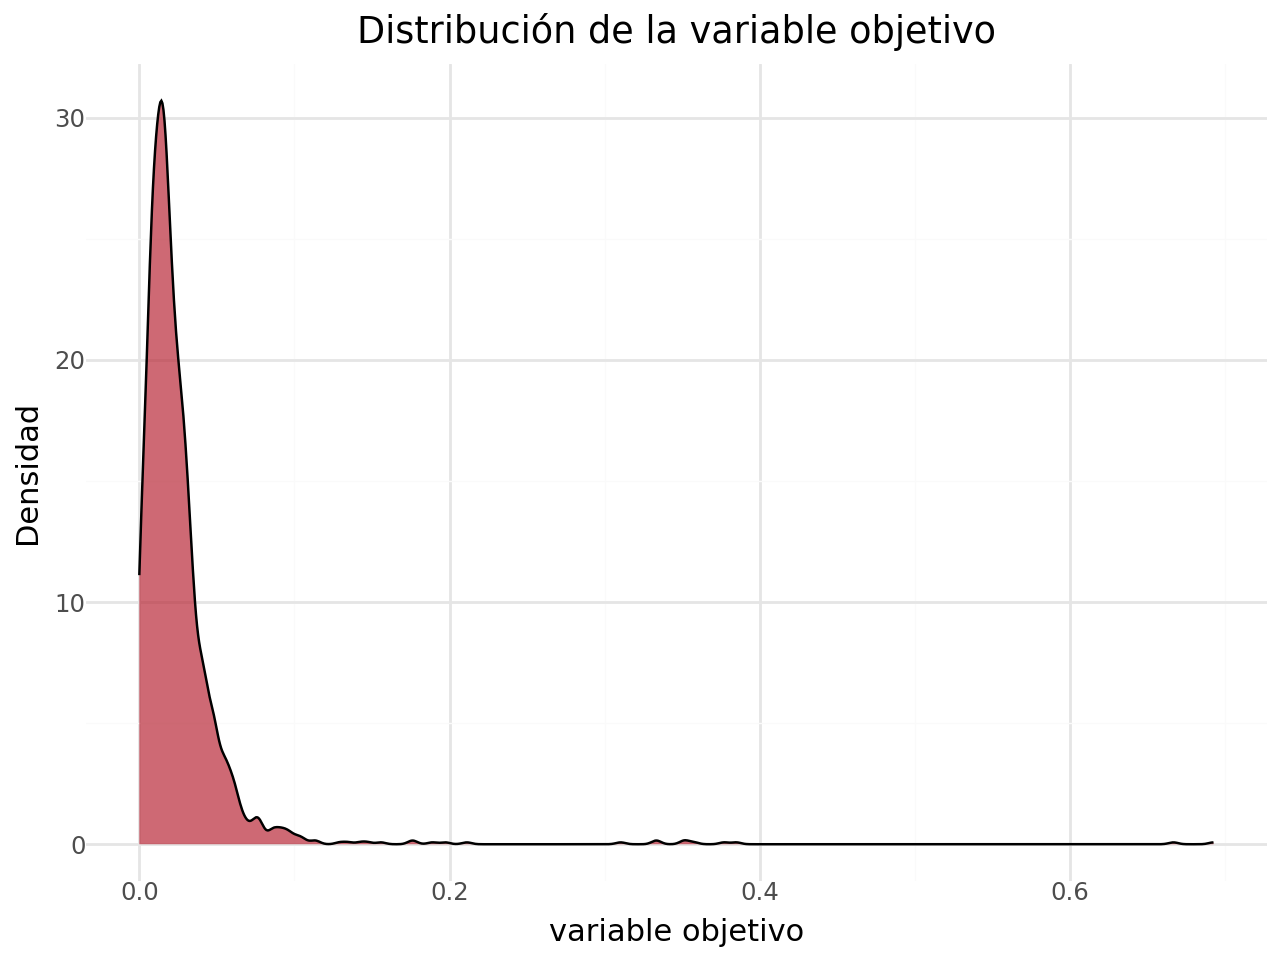

In [9]:
(
    ggplot(df, aes(x='y'))
    + geom_density(fill='#b92938', alpha=0.7)
    + labs(
        title='Distribución de la variable objetivo',
        x='variable objetivo',
        y='Densidad'
    )
    + theme_minimal()
)

## Missing Values

In [10]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Valores nulos por columna:")
display(missing_values)

Valores nulos por columna:


TOT_SINVC_T2                      14
TOT_SINVC_T1                       4
TOT_VC_T2                         78
TOT_VC_T1                         53
TOT_VC_T0                         37
SE_MANTIENE_0_PCT_T1               4
SE_MANTIENE_ATRASO_PCT_T1          4
MEJORA_PCT_T1                      4
EMPEORA_T1                         4
SE_MANTIENE_0_PCT_T2              33
SE_MANTIENE_ATRASO_PCT_T2         33
MEJORA_PCT_T2                     33
EMPEORA_T2                        33
SE_MANTIENE_0_PCT_CATS_T1          4
SE_MANTIENE_ATRASO_PCT_CATS_T1     4
MEJORA_PCT_CATS_T1                 4
EMPEORA_CATS_T1                    4
SE_MANTIENE_0_PCT_CATS_T2         33
SE_MANTIENE_ATRASO_PCT_CATS_T2    33
MEJORA_PCT_CATS_T2                33
EMPEORA_CATS_T2                   33
dtype: int64

In [11]:
lsImputar = list(missing_values.index)

**_Imputador_**

In [12]:
imputador = Pipeline([
    ('imputacion', SimpleImputer(strategy='mean'))
])

In [13]:
preprocesador = ColumnTransformer([
    ('num', imputador, lsImputar)
], remainder='passthrough')

# nos permite que el objeto preprocesador, retorne un DataFrame
preprocesador.set_output(transform="pandas")

,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [14]:
df_transformado = preprocesador.fit_transform(df)

In [15]:
df_transformado.head()

,num__TOT_SINVC_T2,num__TOT_SINVC_T1,num__TOT_VC_T2,num__TOT_VC_T1,num__TOT_VC_T0,num__SE_MANTIENE_0_PCT_T1,num__SE_MANTIENE_ATRASO_PCT_T1,num__MEJORA_PCT_T1,num__EMPEORA_T1,num__SE_MANTIENE_0_PCT_T2,num__SE_MANTIENE_ATRASO_PCT_T2,num__MEJORA_PCT_T2,num__EMPEORA_T2,num__SE_MANTIENE_0_PCT_CATS_T1,num__SE_MANTIENE_ATRASO_PCT_CATS_T1,num__MEJORA_PCT_CATS_T1,num__EMPEORA_CATS_T1,num__SE_MANTIENE_0_PCT_CATS_T2,num__SE_MANTIENE_ATRASO_PCT_CATS_T2,num__MEJORA_PCT_CATS_T2,num__EMPEORA_CATS_T2,remainder__PORC_CR_T14,remainder__PORC_CR_T9,remainder__PORC_CR_T6,remainder__PORC_CR_T0,remainder__PORC_CR_T17,remainder__PORC_CR_T18,remainder__PORC_CR_T4,remainder__PORC_CR_T7,remainder__PORC_CR_T26,remainder__PORC_CR_T2,remainder__PORC_CR_T21,remainder__PORC_CR_T15,remainder__PORC_CR_T8,remainder__PORC_CR_T20,remainder__PORC_CR_T23,remainder__PORC_CR_T11,remainder__PORC_CR_T3,remainder__PORC_CR_T22,remainder__PORC_CR_T13,remainder__PORC_CR_T5,remainder__PORC_CR_T10,remainder__PORC_CR_T16,remainder__PORC_CR_T19,remainder__PORC_CR_T25,remainder__PORC_CR_T12,remainder__PORC_CR_T24,remainder__PORC_CR_T1,remainder__y,remainder__ANT_ASESOR,remainder__C_COBRANZA_T0,remainder__C_COBRANZA_T1,remainder__C_COBRANZA_T2,remainder__HORAS_VUELO,remainder__PORCT_RENOV_T2,remainder__PORCT_RENOV_T1,remainder__PORCT_RENOV_T0,remainder__ANT_ASESOR_RANGO_NUM,remainder__PCNT_FPD_T2,remainder__PCNT_FPD_T1,remainder__PCNT_FPD_T0,remainder__TOT_AMI_T2,remainder__TOT_AMI_T1,remainder__TOT_AMI_T0,remainder__TOT_MAC_T2,remainder__TOT_MAC_T1,remainder__TOT_MAC_T0,remainder__TOT_SINVC_T0,remainder__DESEMBOLSOS_SIN_EXP_T2,remainder__DESEMBOLSOS_CON_EXP_T2,remainder__DESEMBOLSOS_SIN_EXP_T1,remainder__DESEMBOLSOS_CON_EXP_T1,remainder__DESEMBOLSOS_SIN_EXP_T0,remainder__DESEMBOLSOS_CON_EXP_T0,remainder__AVG_CICLOS_EJE_T2,remainder__AVG_CICLOS_EJE_T1,remainder__AVG_CICLOS_EJE_T0,remainder__AVG_CICLOS_CI_T2,remainder__AVG_CICLOS_CI_T1,remainder__AVG_CICLOS_CI_T0,remainder__CLIENTES_EXPERIENCIA_GRUPAL_T2,remainder__CLIENTES_EXPERIENCIA_GRUPAL_T1,remainder__CLIENTES_EXPERIENCIA_GRUPAL_T0,remainder__NUEVOS_PRODUCTO_T2,remainder__NUEVOS_PRODUCTO_T1,remainder__NUEVOS_PRODUCTO_T0,remainder__NUEVOS_PUROS_T2,remainder__NUEVOS_PUROS_T1,remainder__NUEVOS_PUROS_T0,remainder__SEGURO_FAMILIAR_T2,remainder__SEGURO_FAMILIAR_T1,remainder__SEGURO_FAMILIAR_T0,remainder__SEGURO_VOLUNTARIO_T2,remainder__SEGURO_VOLUNTARIO_T1,remainder__SEGURO_VOLUNTARIO_T0,remainder__CTES0_SIN_EXP_T2,remainder__CTES0_CON_EXP_T2,remainder__CTES1A7_SIN_EXP_T2,remainder__CTES1A7_CON_EXP_T2,remainder__CTES8A60_SIN_EXP_T2,remainder__CTES8A60_CON_EXP_T2,remainder__CTES60M_SIN_EXP_T2,remainder__CTES60M_CON_EXP_T2,remainder__CTES0_SIN_EXP_T1,remainder__CTES0_CON_EXP_T1,remainder__CTES1A7_SIN_EXP_T1,remainder__CTES1A7_CON_EXP_T1,remainder__CTES8A60_SIN_EXP_T1,remainder__CTES8A60_CON_EXP_T1,remainder__CTES60M_SIN_EXP_T1,remainder__CTES60M_CON_EXP_T1,remainder__CTES0_SIN_EXP_T0,remainder__CTES0_CON_EXP_T0,remainder__CTES1A7_SIN_EXP_T0,remainder__CTES1A7_CON_EXP_T0,remainder__CTES8A60_SIN_EXP_T0,remainder__CTES8A60_CON_EXP_T0,remainder__CTES60M_SIN_EXP_T0,remainder__CTES60M_CON_EXP_T0,remainder__CR0_SIN_EXP_T2,remainder__CR0_CON_EXP_T2,remainder__CR1A7_SIN_EXP_T2,remainder__CR1A7_CON_EXP_T2,remainder__CR8A60_SIN_EXP_T2,remainder__CR8A60_CON_EXP_T2,remainder__CR60M_SIN_EXP_T2,remainder__CR60M_CON_EXP_T2,remainder__CR0_SIN_EXP_T1,remainder__CR0_CON_EXP_T1,remainder__CR1A7_SIN_EXP_T1,remainder__CR1A7_CON_EXP_T1,remainder__CR8A60_SIN_EXP_T1,remainder__CR8A60_CON_EXP_T1,remainder__CR60M_SIN_EXP_T1,remainder__CR60M_CON_EXP_T1,remainder__CR0_SIN_EXP_T0,remainder__CR0_CON_EXP_T0,remainder__CR1A7_SIN_EXP_T0,remainder__CR1A7_CON_EXP_T0,remainder__CR8A60_SIN_EXP_T0,remainder__CR8A60_CON_EXP_T0,remainder__CR60M_SIN_EXP_T0,remainder__CR60M_CON_EXP_T0,remainder__AVG_ATRASO_ACT_EXP_T2,remainder__AVG_ATRASO_ACT_EXP_T1,remainder__AVG_ATRASO_ACT_EXP_T0,remainder__AVG_ATRASO_ACT_SIN_EXP_T2,remainder__AVG_ATRASO_ACT_SIN_EXP_T1,remainder__AVG_ATRAS

In [16]:
missing_values = df_transformado.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Valores nulos por columna:")
display(missing_values)

Valores nulos por columna:


Series([], dtype: int64)

**_Correlación_**
- Correlacion del top 10 de variables mas correlacionadas con la variable objetivo

In [18]:
top_corr_vars = df_transformado.corr()['remainder__y'].abs().sort_values(ascending=False).index[1:11]

In [19]:
df_long = df_transformado.melt(id_vars=['remainder__y'], value_vars=top_corr_vars)

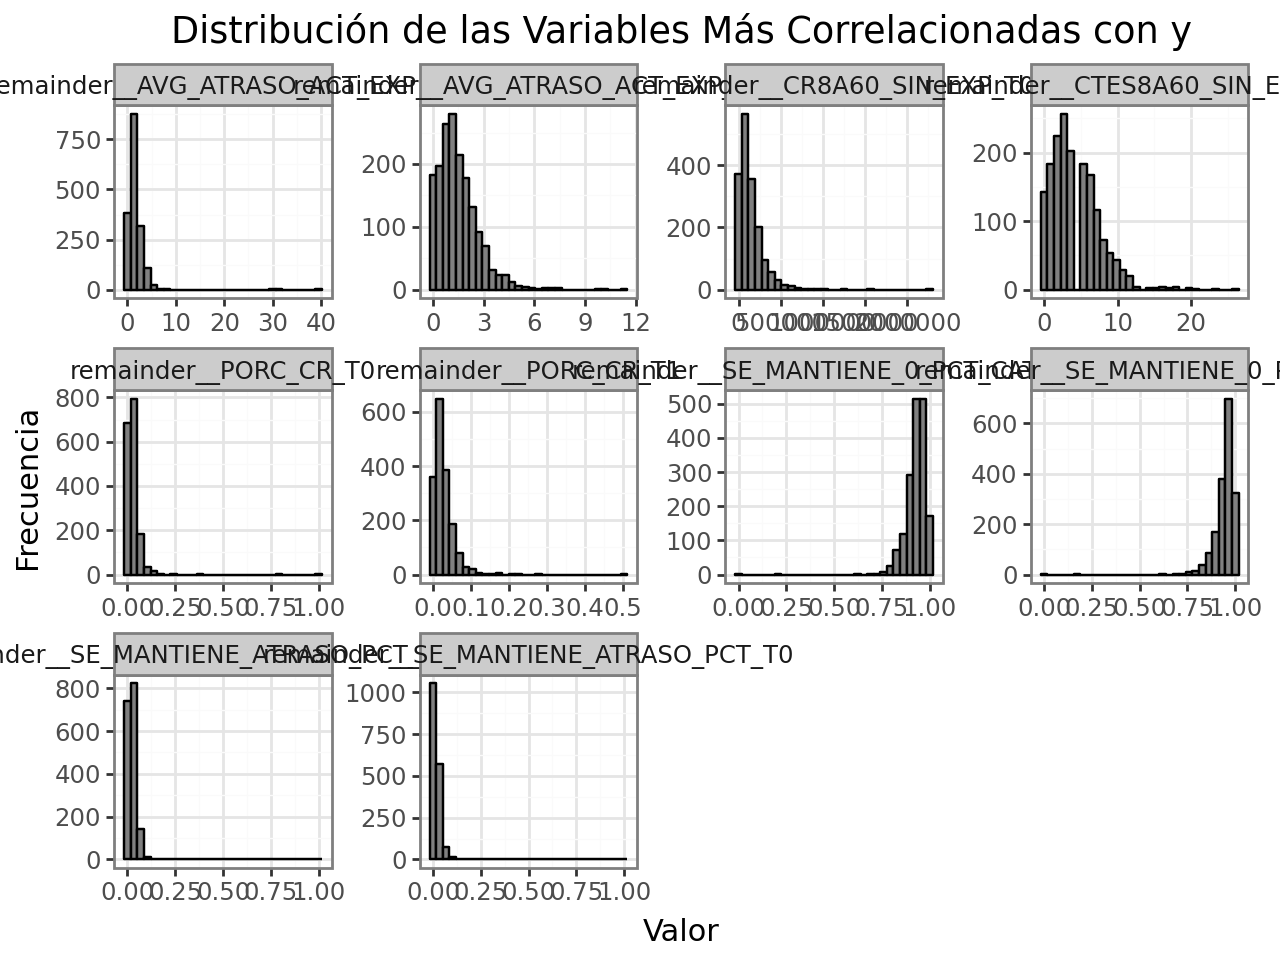

In [20]:
(
    ggplot(df_long, aes(x='value')) +
    geom_histogram(bins=30, fill="gray", color="black") +
    facet_wrap('~variable', scales='free') +
    theme_bw() +
    labs(title='Distribución de las Variables Más Correlacionadas con y', x='Valor', y='Frecuencia') +
    scale_x_continuous()
)

**_Anàlisis de multicolinealidad: VIF_**

In [21]:
top_20corr_vars = df_transformado.corr()['remainder__y'].abs().sort_values(ascending=False).index[1:21]

In [22]:
X = df_transformado[top_corr_vars].dropna()

In [23]:
X = add_constant(X)

In [24]:
X.head()

,const,remainder__SE_MANTIENE_0_PCT_CATS_T0,remainder__PORC_CR_T0,remainder__SE_MANTIENE_0_PCT_T0,remainder__SE_MANTIENE_ATRASO_PCT_CATS_T0,remainder__AVG_ATRASO_ACT_EXP_T0,remainder__SE_MANTIENE_ATRASO_PCT_T0,remainder__PORC_CR_T1,remainder__AVG_ATRASO_ACT_EXP_T1,remainder__CR8A60_SIN_EXP_T0,remainder__CTES8A60_SIN_EXP_T0
ASESOR_ID,,,,,,,,,,,
1949827,1.0,0.944444,0.020897,0.969130,0.009259,1.457143,0.005256,0.018219,0.683673,90888.16,4
1949838,1.0,0.922747,0.034199,0.953349,0.017167,1.600000,0.011261,0.012228,0.181818,343087.18,12
1949853,1.0,0.968992,0.014247,0.975441,0.000000,0.026087,0.000000,0.005416,0.965517,0.00,0
1950001,1.0,0.914062,0.022762,0.928337,0.054688,0.898876,0.037346,0.020934,1.046512,95096.37,4
1950569,1.0,0.966887,0.015462,0.980662,0.013245,0.000000,0.004897,0.021350,2.082569,0.00,0


In [25]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [26]:
vif_data.head()

,Variable,VIF
0,const,1159.613019
1,remainder__SE_MANTIENE_0_PCT_CATS_T0,13.004400
2,remainder__PORC_CR_T0,10.513877
3,remainder__SE_MANTIENE_0_PCT_T0,13.727807
4,remainder__SE_MANTIENE_ATRASO_PCT_CATS_T0,11.617810


In [27]:
import ace_tools_open as tools
vif_data = vif_data[vif_data["Variable"] != "const"]
tools.display_dataframe_to_user(name="Análisis de Multicolinealidad (VIF)", dataframe=vif_data)

Análisis de Multicolinealidad (VIF)


Loading ITables v2.4.2 from the internet... (need help?)


In [28]:
vif_data[vif_data.VIF<10]

,Variable,VIF
5,remainder__AVG_ATRASO_ACT_EXP_T0,9.094325
7,remainder__PORC_CR_T1,3.321433
8,remainder__AVG_ATRASO_ACT_EXP_T1,2.958414
9,remainder__CR8A60_SIN_EXP_T0,3.341768
10,remainder__CTES8A60_SIN_EXP_T0,3.780465


In [29]:
vif_data[vif_data.VIF>8].sort_values(by='VIF', ascending=False)

,Variable,VIF
3,remainder__SE_MANTIENE_0_PCT_T0,13.727807
1,remainder__SE_MANTIENE_0_PCT_CATS_T0,13.004400
4,remainder__SE_MANTIENE_ATRASO_PCT_CATS_T0,11.617810
2,remainder__PORC_CR_T0,10.513877
6,remainder__SE_MANTIENE_ATRASO_PCT_T0,10.412470
5,remainder__AVG_ATRASO_ACT_EXP_T0,9.094325


**_Conclusiones VIF_**
- Tenemos variables con un factor VIF mayor a 8, lo que implica que son altamente redundantes con otra svariables
- podrìamos quitar directamente estas variables 

**_ridge para seleccion de variables_**
- utilizar la regresion ridge par aseleccion de variables nos permite agregar variables que descartariamos por metodos de correlacion o VIF, con una penalizaciòn en el coeficiente para evitar sobre ajuste
- con lo cual tenemos un mètodo mas robusto de seleccion de variables para entrenar un modelo

In [31]:
top_corr_vars = df_transformado.corr()['remainder__y'].abs().sort_values(ascending=False).index[1:51]

In [33]:
X = df_transformado[top_corr_vars]
y = df_transformado['remainder__y']

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
ridge = RidgeCV(cv=5).fit(X_train, y_train)

In [50]:
coeficientes_ridge = pd.Series(ridge.coef_, index=top_corr_vars)
coeficientes_ridge = coeficientes_ridge[coeficientes_ridge.abs() > 0.001].sort_values(ascending=False)

In [51]:
tools.display_dataframe_to_user(name="Variables Seleccionadas por Ridge", dataframe=coeficientes_ridge.to_frame(name='Coeficiente'))

Variables Seleccionadas por Ridge


Loading ITables v2.4.2 from the internet... (need help?)


In [54]:
lsVars = coeficientes_ridge.index.tolist()

In [65]:
lsVars.append('remainder__y')

In [66]:
variables_seleccionadas = [v.replace('num__', '').replace('remainder__', '') for v in lsVars]

In [67]:
variables_seleccionadas

['PCNT_FPD_T0',
 'AVG_ATRASO_ACT_EXP_T1',
 'SE_MANTIENE_ATRASO_PCT_CATS_T0',
 'SE_MANTIENE_0_PCT_CATS_T1',
 'CR8A60_SIN_EXP_T0',
 'SE_MANTIENE_ATRASO_PCT_T1',
 'PORC_CR_T1',
 'C_COBRANZA_T0',
 'SE_MANTIENE_0_PCT_T2',
 'CR8A60_CON_EXP_T2',
 'EMPEORA_T2',
 'EMPEORA_CATS_T0',
 'PORC_CR_T2',
 'SE_MANTIENE_0_PCT_T1',
 'AVG_CICLOS_EJE_T1',
 'CTES8A60_SIN_EXP_T2',
 'AVG_ATRASO_ACT_EXP_T2',
 'PORC_CR_T10',
 'CR8A60_CON_EXP_T1',
 'CTES8A60_SIN_EXP_T1',
 'EMPEORA_CATS_T1',
 'SE_MANTIENE_ATRASO_PCT_T0',
 'SE_MANTIENE_0_PCT_CATS_T2',
 'AVG_CICLOS_EJE_T0',
 'DESEMBOLSOS_SIN_EXP_T0',
 'AVG_CICLOS_EJE_T2',
 'TOT_MAC_T0',
 'EMPEORA_CATS_T2',
 'SE_MANTIENE_ATRASO_PCT_CATS_T2',
 'DESEMBOLSOS_CON_EXP_T0',
 'EMPEORA_T1',
 'PORC_CR_T0',
 'CR8A60_SIN_EXP_T1',
 'SE_MANTIENE_0_PCT_T0',
 'EMPEORA_T0',
 'CR8A60_SIN_EXP_T2',
 'AVG_ATRASO_ACT_EXP_T0',
 'SE_MANTIENE_ATRASO_PCT_CATS_T1',
 'SE_MANTIENE_0_PCT_CATS_T0',
 'PCNT_FPD_T1',
 'y']

In [68]:
dfEntrenamiento = df_transformado[lsVars]

In [71]:
dfEntrenamiento.head()

,PCNT_FPD_T0,AVG_ATRASO_ACT_EXP_T1,SE_MANTIENE_ATRASO_PCT_CATS_T0,SE_MANTIENE_0_PCT_CATS_T1,CR8A60_SIN_EXP_T0,SE_MANTIENE_ATRASO_PCT_T1,PORC_CR_T1,C_COBRANZA_T0,SE_MANTIENE_0_PCT_T2,CR8A60_CON_EXP_T2,EMPEORA_T2,EMPEORA_CATS_T0,PORC_CR_T2,SE_MANTIENE_0_PCT_T1,AVG_CICLOS_EJE_T1,CTES8A60_SIN_EXP_T2,AVG_ATRASO_ACT_EXP_T2,PORC_CR_T10,CR8A60_CON_EXP_T1,CTES8A60_SIN_EXP_T1,EMPEORA_CATS_T1,SE_MANTIENE_ATRASO_PCT_T0,SE_MANTIENE_0_PCT_CATS_T2,AVG_CICLOS_EJE_T0,DESEMBOLSOS_SIN_EXP_T0,AVG_CICLOS_EJE_T2,TOT_MAC_T0,EMPEORA_CATS_T2,SE_MANTIENE_ATRASO_PCT_CATS_T2,DESEMBOLSOS_CON_EXP_T0,EMPEORA_T1,PORC_CR_T0,CR8A60_SIN_EXP_T1,SE_MANTIENE_0_PCT_T0,EMPEORA_T0,CR8A60_SIN_EXP_T2,AVG_ATRASO_ACT_EXP_T0,SE_MANTIENE_ATRASO_PCT_CATS_T1,SE_MANTIENE_0_PCT_CATS_T0,PCNT_FPD_T1,y
ASESOR_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1949827,0.152381,0.683673,0.009259,0.970874,90888.16,0.006920,0.018219,8.0,0.955265,0.00,0.009064,0.037037,0.033791,0.978869,5.097345,6,2.980392,0.037075,0.00,3,0.019417,0.005256,0.940000,5.091667,11,5.563025,120,0.010000,0.050000,1,0.014211,0.020897,89830.95,0.969130,0.020602,168818.32,1.457143,0.009709,0.944444,0.145455,0.040606
1949838,0.065789,0.181818,0.017167,0.944444,343087.18,0.004296,0.012228,10.0,0.964142,36711.70,0.010338,0.051502,0.025734,0.966596,8.355102,7,1.815029,0.028392,60001.33,2,0.041667,0.011261,0.950226,8.282258,6,8.384298,248,0.013575,0.027149,9,0.023876,0.034199,69544.34,0.953349,0.032512,214705.01,1.600000,0.004630,0.922747,0.062500,0.021462
1949853,0.031008,0.965517,0.000000,0.969466,0.00,0.003437,0.005416,5.0,0.958710,140976.64,0.023682,0.031008,0.031179,0.977713,8.816901,2,0.538462,0.002753,0.00,3,0.015267,0.000000,0.952000,8.829787,9,8.645833,141,0.016000,0.032000,3,0.002687,0.014247,35154.38,0.975441,0.024559,61941.89,0.026087,0.007634,0.968992,0.028169,0.036736
1950001,0.088000,1.046512,0.054688,0.909091,95096.37,0.013819,0.020934,2.0,0.976219,0.00,0.012259,0.031250,0.009430,0.940280,7.956835,2,0.567901,0.016517,74428.45,3,0.041322,0.037346,0.947368,8.062069,11,8.038462,145,0.035088,0.017544,6,0.039734,0.022762,79940.91,0.928337,0.034317,64086.21,0.898876,0.033058,0.914062,0.095588,0.049911
1950569,0.154930,2.082569,0.013245,0.945205,0.00,0.020399,0.021350,3.0,0.977527,0.00,0.020058,0.013245,0.019388,0.973692,7.220238,6,1.528302,0.013959,46664.30,5,0.013699,0.004897,0.954248,7.069767,13,7.463415,170,0.032680,0.013072,8,0.005908,0.015462,156927.55,0.980662,0.012421,169548.76,0.000000,0.041096,0.966887,0.150943,0.019222


In [69]:
dfEntrenamiento.columns = variables_seleccionadas

In [70]:
dfEntrenamiento.head()

,PCNT_FPD_T0,AVG_ATRASO_ACT_EXP_T1,SE_MANTIENE_ATRASO_PCT_CATS_T0,SE_MANTIENE_0_PCT_CATS_T1,CR8A60_SIN_EXP_T0,SE_MANTIENE_ATRASO_PCT_T1,PORC_CR_T1,C_COBRANZA_T0,SE_MANTIENE_0_PCT_T2,CR8A60_CON_EXP_T2,EMPEORA_T2,EMPEORA_CATS_T0,PORC_CR_T2,SE_MANTIENE_0_PCT_T1,AVG_CICLOS_EJE_T1,CTES8A60_SIN_EXP_T2,AVG_ATRASO_ACT_EXP_T2,PORC_CR_T10,CR8A60_CON_EXP_T1,CTES8A60_SIN_EXP_T1,EMPEORA_CATS_T1,SE_MANTIENE_ATRASO_PCT_T0,SE_MANTIENE_0_PCT_CATS_T2,AVG_CICLOS_EJE_T0,DESEMBOLSOS_SIN_EXP_T0,AVG_CICLOS_EJE_T2,TOT_MAC_T0,EMPEORA_CATS_T2,SE_MANTIENE_ATRASO_PCT_CATS_T2,DESEMBOLSOS_CON_EXP_T0,EMPEORA_T1,PORC_CR_T0,CR8A60_SIN_EXP_T1,SE_MANTIENE_0_PCT_T0,EMPEORA_T0,CR8A60_SIN_EXP_T2,AVG_ATRASO_ACT_EXP_T0,SE_MANTIENE_ATRASO_PCT_CATS_T1,SE_MANTIENE_0_PCT_CATS_T0,PCNT_FPD_T1,y
ASESOR_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1949827,0.152381,0.683673,0.009259,0.970874,90888.16,0.006920,0.018219,8.0,0.955265,0.00,0.009064,0.037037,0.033791,0.978869,5.097345,6,2.980392,0.037075,0.00,3,0.019417,0.005256,0.940000,5.091667,11,5.563025,120,0.010000,0.050000,1,0.014211,0.020897,89830.95,0.969130,0.020602,168818.32,1.457143,0.009709,0.944444,0.145455,0.040606
1949838,0.065789,0.181818,0.017167,0.944444,343087.18,0.004296,0.012228,10.0,0.964142,36711.70,0.010338,0.051502,0.025734,0.966596,8.355102,7,1.815029,0.028392,60001.33,2,0.041667,0.011261,0.950226,8.282258,6,8.384298,248,0.013575,0.027149,9,0.023876,0.034199,69544.34,0.953349,0.032512,214705.01,1.600000,0.004630,0.922747,0.062500,0.021462
1949853,0.031008,0.965517,0.000000,0.969466,0.00,0.003437,0.005416,5.0,0.958710,140976.64,0.023682,0.031008,0.031179,0.977713,8.816901,2,0.538462,0.002753,0.00,3,0.015267,0.000000,0.952000,8.829787,9,8.645833,141,0.016000,0.032000,3,0.002687,0.014247,35154.38,0.975441,0.024559,61941.89,0.026087,0.007634,0.968992,0.028169,0.036736
1950001,0.088000,1.046512,0.054688,0.909091,95096.37,0.013819,0.020934,2.0,0.976219,0.00,0.012259,0.031250,0.009430,0.940280,7.956835,2,0.567901,0.016517,74428.45,3,0.041322,0.037346,0.947368,8.062069,11,8.038462,145,0.035088,0.017544,6,0.039734,0.022762,79940.91,0.928337,0.034317,64086.21,0.898876,0.033058,0.914062,0.095588,0.049911
1950569,0.154930,2.082569,0.013245,0.945205,0.00,0.020399,0.021350,3.0,0.977527,0.00,0.020058,0.013245,0.019388,0.973692,7.220238,6,1.528302,0.013959,46664.30,5,0.013699,0.004897,0.954248,7.069767,13,7.463415,170,0.032680,0.013072,8,0.005908,0.015462,156927.55,0.980662,0.012421,169548.76,0.000000,0.041096,0.966887,0.150943,0.019222


In [72]:
dfEntrenamiento.to_parquet(os.path.join(PROCESSED_DATA_DIR,'datos_entrenamiento_vf.parquet'))